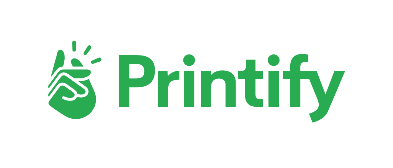<br>
<br>
<br>
<br>
<br>
# Merchants' Order Assignment (October to December 2020)
<br>**Data Source**: Sent by email (miks@printify.com)<br>

**Purpose**:<br> 
*Answering the below questions and delivering your findings via a presentation*<br>
1- Review and clean data if necessary<br>
2- How many orders our merchants generate on from which sales channels do they come?<br>
3- What is the average quantity of line items per each product type and each product brand?<br>
4- Which are the most used shipping carriers and which are the fastest ones?<br>
5- Are there any problematic print providers?<br>
6- What characteristics describe more successful merchants?<br>
7- Optional - write SQL code to generate table that shows following:<br>
>  Merchants ordered by having generated the most number of orders in "T-Shirt" category.<br>
>  The table should contain:<br>
>  A- total number of orders;<br>
>  B- total amount of money collected from merchant<br>
>  C- average order complete fulfillement time (from the moment order was generated till the moment it was delivered)

**Desired Outcome**:<br>
Summarise results of analysis in a presentation format covering the most important aspects and outcomes. You are welcome to make assumptions, just please write them down.

**Procedure**: <br>
1- Read the dataset from the local path (E)<br> 
2- Profiling, Cleansing, Exploratory Analysis (T)<br> 
3- Answering the above business questions.<br> 
4- Defining relevant KPIs if needed (See at the end)<br> 
5- Saving Jupyter output in PowerBi data folder and load the data for report and visualization (L)<br> 


**Logical diagram and useful tips to make the project more understandable:**<br>
*Sales channels examples*: Shopify, Etsy, WooCommerce, Wix, eBay, or merchants' custom store.<br>


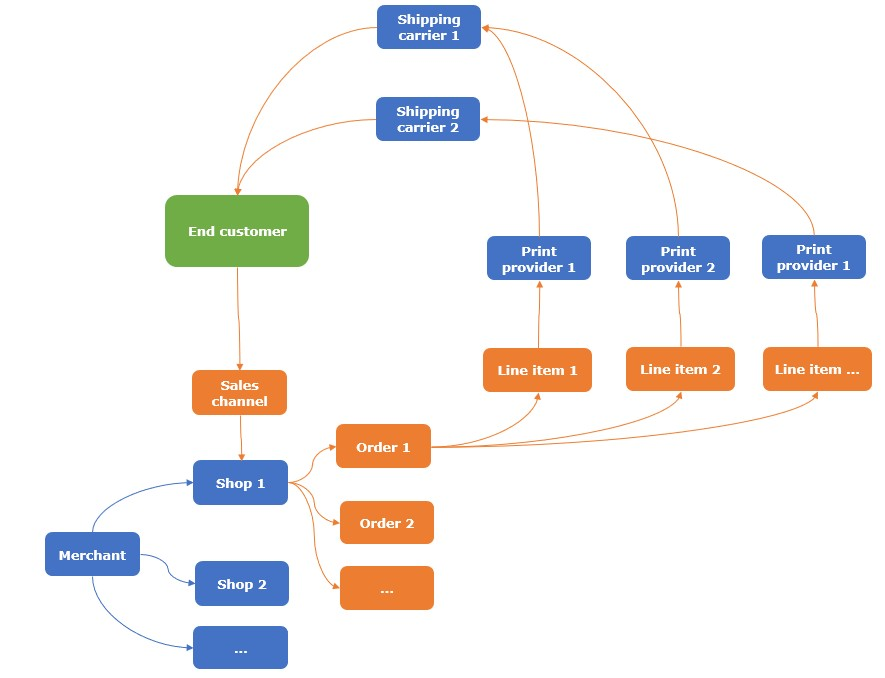<br>

# 1- Read data from the local path

In [1]:
# Import all libraries
import pandas as pd											# data manipulation
import matplotlib.pyplot as plt								# graphs
import seaborn as sns										# graphs
import numpy as np											# graphs
from scipy.stats import norm								# statistics
from sklearn.preprocessing import StandardScaler			# statistics
from scipy import stats										# statistics
from math import *											# advance calculation	
from matplotlib import cm									# graphs
from matplotlib.pyplot import figure						# graphs
import sys													# system functions
import warnings												# indicating warnings
warnings.filterwarnings('ignore')							# ignore by default
from matplotlib.ticker import LinearLocator					# graphs
pd.set_option('display.max_columns', None)					# show all columns
pd.set_option('display.max_rows', None)						# show all rows
np.set_printoptions(threshold=sys.maxsize)					# show arrays full
pd.set_option("display.max_colwidth", -1)					# show a complete text in a cell
pd.set_option('display.precision',5)						# precision decimals pd
np.set_printoptions(precision=3)							# precision decimals np
from xlsxwriter.workbook import Workbook					# CSV writing
import csv													# CSV writing	
import xgboost as xgb										# prediction
import pickle												# prediction	
import sklearn												# mutual information
import statsmodels.api as sm								# coefficient
from sklearn.ensemble import RandomForestClassifier			# random forest
from sklearn import linear_model							# linear regression
import pymysql												# MySql connection
import psycopg2												# PostgreSQL database adapter
import datetime												# time conversions
import random												# randomchoice
import math as math											# maths
import statistics											# statistics
import glob													# paths and files management
import matplotlib.image as mpimg							# matplot image
from functools import reduce								# reduce
import folium												# interactive map
from folium.plugins import FastMarkerCluster				# interactive map
import cufflinks as cf										# Cufflink

In [72]:
# Read two CSV files which was alreasy extracted and converted from the Excel files
lineitems = pd.read_csv('line_items.csv')
orders = pd.read_csv('orders.csv', encoding= 'latin_1')

# 2- Transferring data(T)
# 2-1 Profiling

In [3]:
# I won't include all of the profiling part to avoind generating a long notebook
# I will start by head, sample, tail, describe, info, loc, shaoe, and etc. to understand the datasets
orders.head(10)

,MERCHANT_ID,ORDER_ID,SHOP_ID,ADDRESS_TO_COUNTRY,ADDRESS_TO_REGION,ORDER_DT,FULFILLED_DT,REPRINT_FLAG,SALES_CHANNEL_TYPE_ID,TOTAL_COST,TOTAL_SHIPPING,MERCHANT_REGISTERED_DT,SUB_IS_ACTIVE_FLAG,SUB_PLAN,SHIPMENT_CARRIER,SHIPMENT_DELIVERD_DT
0,7143578,2.01324e+06,2013244,US,WA,10/2/2020,10/20/2020,NaN,9,2902,2200,5/19/2020,True,business_account_3,UPS,10/8/2020
1,5888534,1.35843e+06,1358429,US,MN,11/21/2020,11/23/2020,NaN,4,1149,924,2/8/2018,True,business_account_3,USPS,11/28/2020
2,6484224,9.39390e+05,939390,US,AK,10/25/2020,10/26/2020,NaN,1,977,400,4/9/2019,True,business_account_3,USPS,11/2/2020
3,7251033,1.85611e+06,1856107,US,PA,10/8/2020,10/10/2020,NaN,1,661,800,7/20/2020,True,business_account_3,UPS,10/15/2020
4,7241488,1.84390e+06,1843904,US,CO,11/17/2020,11/18/2020,NaN,2,719,424,7/15/2020,True,business_account_3,USPS,11/24/2020
5,6949441,1.47721e+06,1477206,US,NV,10/7/2020,10/8/2020,NaN,1,805,400,12/27/2019,True,Plan 4,USPS,10/12/2020
6,7146390,1.72031e+06,1720307,US,CO,11/13/2020,11/15/2020,NaN,1,3010,1024,5/21/2020,True,business_account_3,USPS,11/19/2020
7,6179493,6.04434e+05,604434,US,GA,10/31/2020,11/4/2020,NaN,4,1306,700,10/28/2018,True,Plan 4,USPS,NaN
8,7110135,1.81301e+06,1813012,US,IN,11/13/2020,11/14/2020,NaN,4,1602,624,4/27/2020,True,business_account_3,USPS,11/19/2020
9,5900409,1.32583e+06,1325831,BE,NaN,11/11/2020,11/12/2020,NaN,1,2880,1180,2/23/2018,True,Plan 4,NaN,NaN


In [375]:
lineitems.head(10)

,ORDER_ID,PRINT_PROVIDER_ID,PRODUCT_BRAND,PRODUCT_TYPE,ITEM_STATUS,QUANTITY
0,1.75002e+06,30,Generic brand,Mug,on-hold,3
1,1.75002e+06,30,Generic brand,Mug,on-hold,2
2,1.22516e+06,16,Gildan,Kids clothes,shipment_delivered,1
3,1.82889e+06,39,Bella+Canvas,T-Shirt,shipment_delivered,1
4,1.84785e+06,10,Generic brand,Accessories,shipment_delivered,1
5,1.75002e+06,30,Generic brand,Mug,on-hold,1
6,4.66848e+05,10,Generic brand,Bags,shipment_delivered,1
7,1.56996e+06,45,Gildan,Sweatshirt,fulfilled,1
8,2.00443e+06,29,Gildan,Sweatshirt,shipment_delivered,1
9,2.25566e+05,25,Bella+Canvas,T-Shirt,shipment_delivered,1


In [78]:
# Show null values and duplicates
def nulldup(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100, 3)
    missing_data = pd.concat([total, percent], axis=1, keys=['NullTotal', 'Null%'])
    for dup in missing_data.index:
        missing_data.at[dup,'DupTotal'] = df.duplicated(subset=[dup]).sum()
        missing_data.at[dup,'Dup%'] = round((df.duplicated(subset=[dup]).sum())/df.shape[0]*100,3)
    display(missing_data)
nulldup(orders)

,NullTotal,Null%,DupTotal,Dup%
REPRINT_FLAG,13403,99.237,13504.0,99.985
SUB_PLAN,3609,26.721,13501.0,99.963
SHIPMENT_DELIVERD_DT,2594,19.206,13381.0,99.074
SHIPMENT_CARRIER,1673,12.387,13489.0,99.874
FULFILLED_DT,869,6.434,13389.0,99.134
ADDRESS_TO_REGION,576,4.265,13111.0,97.075
ADDRESS_TO_COUNTRY,1,0.007,13439.0,99.504
SUB_IS_ACTIVE_FLAG,0,0.000,13504.0,99.985
MERCHANT_REGISTERED_DT,0,0.000,12491.0,92.485
TOTAL_SHIPPING,0,0.000,12907.0,95.565


In [79]:
# Count Values
def count(df):
    pd.set_option('display.max_rows', 10)
    for column in df.columns:
        print(column,':')
        display(df[column].value_counts(dropna=False))
        print('___________________________________','\n')
count(orders)

MERCHANT_ID :


7019548    150
6433350    106
7084134    99 
5755049    81 
6046074    81 
           .. 
6223899    1  
7632114    1  
7208163    1  
7173346    1  
7153543    1  
Name: MERCHANT_ID, Length: 4660, dtype: int64

___________________________________ 

ORDER_ID :


5.16066e+05    2
2.11986e+06    2
7.52154e+05    2
2.23264e+06    2
2.07844e+06    2
              ..
1.73581e+06    1
2.17641e+06    1
2.03294e+06    1
1.51904e+06    1
4.02734e+05    1
Name: ORDER_ID, Length: 13495, dtype: int64

___________________________________ 

SHOP_ID :


1559676    150
105752     81 
1280396    81 
2151136    73 
1750015    71 
           .. 
1825960    1  
2057383    1  
2223270    1  
324773     1  
2101416    1  
Name: SHOP_ID, Length: 5049, dtype: int64

___________________________________ 

ADDRESS_TO_COUNTRY :


US     11816
CA     515  
GB     416  
DE     261  
AU     89   
       ..   
QA     1    
TN     1    
AR     1    
RU     1    
NaN    1    
Name: ADDRESS_TO_COUNTRY, Length: 67, dtype: int64

___________________________________ 

ADDRESS_TO_REGION :


CA                  1576
TX                  810 
NY                  761 
FL                  636 
NaN                 576 
                   ...  
BERLIN              1   
MERTHYR TYDFIL      1   
CENTRAL DISTRICT    1   
M?úNSINGEN          1   
CAERPHILLY          1   
Name: ADDRESS_TO_REGION, Length: 395, dtype: int64

___________________________________ 

ORDER_DT :


12/8/2020     331
12/1/2020     315
12/7/2020     303
12/2/2020     297
12/9/2020     294
             ... 
10/11/2020    79 
10/25/2020    79 
12/25/2020    71 
11/1/2020     68 
10/18/2020    62 
Name: ORDER_DT, Length: 91, dtype: int64

___________________________________ 

FULFILLED_DT :


NaN           869
12/18/2020    343
12/16/2020    289
12/8/2020     263
12/9/2020     257
             ... 
1/25/2021     3  
1/22/2021     2  
1/1/2021      2  
1/23/2021     2  
1/18/2021     1  
Name: FULFILLED_DT, Length: 117, dtype: int64

___________________________________ 

REPRINT_FLAG :


NaN     13403
True    103  
Name: REPRINT_FLAG, dtype: int64

___________________________________ 

SALES_CHANNEL_TYPE_ID :


4     5372
2     4150
1     3278
6     298 
3     203 
9     172 
7     26  
11    7   
Name: SALES_CHANNEL_TYPE_ID, dtype: int64

___________________________________ 

TOTAL_COST :


805      767
609      553
491      513
0        352
431      265
        ... 
3021     1  
1012     1  
1044     1  
5158     1  
10079    1  
Name: TOTAL_COST, Length: 2234, dtype: int64

___________________________________ 

TOTAL_SHIPPING :


424     2753
400     1242
824     1224
624     536 
524     429 
       ...  
1739    1   
1755    1   
1859    1   
3954    1   
3974    1   
Name: TOTAL_SHIPPING, Length: 599, dtype: int64

___________________________________ 

MERCHANT_REGISTERED_DT :


2/20/2020     160
7/13/2020     145
4/27/2020     125
3/20/2019     115
5/21/2020     107
             ... 
8/19/2017     1  
3/5/2019      1  
6/14/2019     1  
12/13/2018    1  
6/29/2019     1  
Name: MERCHANT_REGISTERED_DT, Length: 1015, dtype: int64

___________________________________ 

SUB_IS_ACTIVE_FLAG :


True     9842
False    3664
Name: SUB_IS_ACTIVE_FLAG, dtype: int64

___________________________________ 

SUB_PLAN :


business_account_3    8985
NaN                   3609
Plan 4                790 
business_account_1    101 
business_account_2    21  
Name: SUB_PLAN, dtype: int64

___________________________________ 

SHIPMENT_CARRIER :


USPS                    9588
NaN                     1673
UPS_MAIL_INNOVATIONS    626 
DHL                     388 
GLOBEGISTICS            292 
                       ...  
ups_                    8   
RAYAL_MAIL              7   
DHL_EXPRESS             6   
FEDEX                   2   
OSM_WORLDWIDE           1   
Name: SHIPMENT_CARRIER, Length: 17, dtype: int64

___________________________________ 

SHIPMENT_DELIVERD_DT :


NaN           2594
12/21/2020    358 
12/22/2020    274 
12/26/2020    267 
12/14/2020    263 
             ...  
4/14/2020     1   
3/21/2020     1   
5/2/2020      1   
3/9/2020      1   
2/17/2020     1   
Name: SHIPMENT_DELIVERD_DT, Length: 125, dtype: int64

___________________________________ 



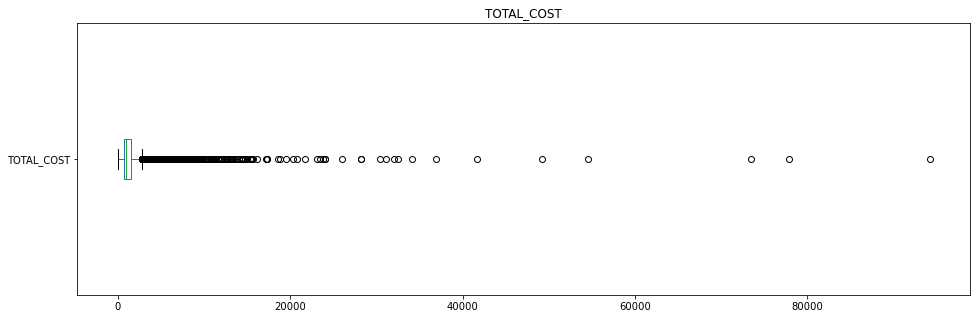

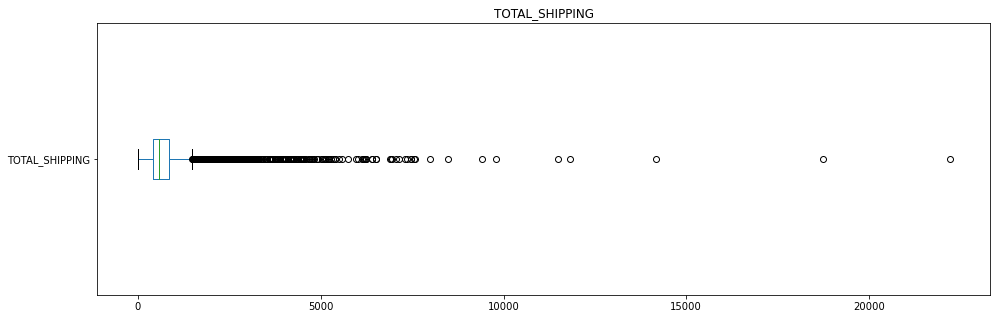

In [289]:
# Spotting outliers
# Defining continuous_feature (Not being an object, not having 'DT') 
continuous_feature = [feature for feature in orders.columns if orders[feature].dtypes != 'O' and 'DT' not in feature]

# Drawing boxplots
for feature in continuous_feature:
    orders[feature].plot(kind='box', vert=False, figsize=(16,5));
    plt.title(feature)
    plt.show()

# I need lineitems as well to deal with outliers. So, after merge I will decide how I'll treat with them

# 2-2 Cleansing

In [73]:
                    #///////////////////////////////////////////////////////////////////////#
                    #////                       'orders' dataset                        ////#
                    #///////////////////////////////////////////////////////////////////////#

################################################
#                  1- Typos                    #
################################################
# 1-1 For some reason the encoding couldn't read the CSV for all latino letters. While most of them are literate others seems to
# be missed, so I will fix it using correction alphabets as follows:
orders.replace({'ADDRESS_TO_REGION': {'\?ñ' : 'Ö','\?ú' : 'Ü','\?Ä' : 'À','\?¥' : 'Å','\?é' : 'Î','\?à' : 'È','\?ë' : 'Ñ',\
                                      '\?ò' : 'Ø','\?Ñ' : 'Ä','\?â' : 'É','\?Ü' : 'Æ'}}, inplace=True, regex=True)
# 1-2- Replacing typos/errors in ADDRESS_TO_REGION:
orders.replace({'ADDRESS_TO_REGION': {'ENG' : 'ENGLAND','ENGALND' : 'ENGLAND','COUNTY' : np.nan,'DENMARK' : np.nan,
    'COUNTY (OPTIONAL)' : np.nan,'BRUXELLES' : 'BRUSSELS','FRANCE' : np.nan,'NORTHD' : 'ND','8681082' : np.nan,
    'AUCKLAND' : 'AUK','HUMPOLEC, 39601, CZ' : 'HUMPOLEC','BEDS' : np.nan,'IE-D' : np.nan,'IS-1':np.nan,'ILSEDE':np.nan,
                           'ABBA KOVNER 11':np.nan }}, inplace=True, regex=True)
orders.at[orders.loc[orders['ADDRESS_TO_REGION'] == 'ÊÑõÁüÁúå'].index,'ADDRESS_TO_REGION'] = np.nan
# 1-3 single characters to be replaced by np.nan in ADDRESS_TO_REGION (D,C,B,M,Z)
target = orders['ADDRESS_TO_REGION'].str.len() == 1
singlechar = (target).sort_values(ascending=False)[:(target).sum()].index
orders.at[singlechar, 'ADDRESS_TO_REGION'] = np.nan
# 1-4 Deal with white spaces
orders['ADDRESS_TO_REGION'] = orders['ADDRESS_TO_REGION'].str.strip()
# 1-5 Replace some common mistakes
orders.replace({'ADDRESS_TO_REGION': {'CA-': '','AU-': '','\\t':'','CO ': '','CO. ': '','CO. ':''}}, inplace=True, regex=True)
# 1-6 Replace ISO codes, for large datasets we need a lookup table from (www.iso.org)
orders.replace({'ADDRESS_TO_REGION': {'PT-01': 'AVEIRO','TH-10': 'BANGKOK','JP-26':'KYOTO','JP-12': 'CHIBA','JP-13': 'TOKYO',\
                                      'KR-11' : 'SEOUL'}}, inplace=True, regex=True)
# 1-7 Replace some SHIPMENT_CARRIER values
orders.replace({'SHIPMENT_CARRIER':{'DHL_GERMANY':'DHL','RAYAL_MAIL': 'ROYAL_MAIL','unknown': np.nan}},inplace=True, regex=True)
# 1-8 Replace 'ups_' by 'UPS'. The reason is that its TOTAL_SHIPPING median is closer to UPS rather than UPS_MAIL_INNOVATIONS 
# (UPS: 1274 & ups_: 12 but UPS_MAIL_INNOVATIONS: 524)
orders.replace({'SHIPMENT_CARRIER':{'ups_':'UPS'}},inplace=True, regex=True)
################################################
#               2- Converting                  #
################################################
# 2-1 All Timestamps need to be changed into Pandas datetime to make it responsive to operators
orders['ORDER_DT'] = pd.to_datetime(orders['ORDER_DT'])
orders['FULFILLED_DT'] = pd.to_datetime(orders['FULFILLED_DT'])
orders['MERCHANT_REGISTERED_DT'] = pd.to_datetime(orders['MERCHANT_REGISTERED_DT'])
orders['SHIPMENT_DELIVERD_DT'] = pd.to_datetime(orders['SHIPMENT_DELIVERD_DT'])
# 2-2 int to str for IDs and channels
orders['SALES_CHANNEL_TYPE_ID'] = orders['SALES_CHANNEL_TYPE_ID'].astype(str)
orders['MERCHANT_ID'] = orders['MERCHANT_ID'].astype(str)
orders['SHOP_ID'] = orders['SHOP_ID'].astype(str)
# 2-3 Keep 5 decimals of ORDER_ID to make sure we haven't missed any decimals
orders['ORDER_ID'] = orders['ORDER_ID'].apply(lambda x: '%.5f' % x)
# 2-4 Just for consistancy of MERCHANT_ID, I will reformat them into 7 digits.
orders['MERCHANT_ID'] = orders['MERCHANT_ID'].apply(lambda x: '{0:0>7}'.format(x))
# 2-5 Rescale two columns of REPRINT_FLAG and SUB_IS_ACTIVE_FLAG to % 
orders.at[orders.loc[orders['REPRINT_FLAG'] == True].index,'REPRINT_FLAG'] = 100
orders.at[orders.loc[orders['REPRINT_FLAG'].isnull()].index,'REPRINT_FLAG'] = 0
orders.at[orders.loc[orders['SUB_IS_ACTIVE_FLAG'] == True].index,'SUB_IS_ACTIVE_FLAG'] = 100
orders.at[orders.loc[orders['SUB_IS_ACTIVE_FLAG'] == False].index,'SUB_IS_ACTIVE_FLAG'] = 0
# 2-6 Modify all values of SUB_PLAN to begin with 'Plan'
orders.replace({'SUB_PLAN': {'business_account_': 'Plan '}}, inplace=True, regex=True)
# 2-7 Sort by MERCHANT_ID', 'SHOP_ID','ORDER_ID' in order, and reset indexes
orders = orders.sort_values(['MERCHANT_ID', 'SHOP_ID','ORDER_ID'], ascending=[True, True, True])
orders = orders.reset_index(drop=True)
# 2-8- Swap SHOP_ID and ORDER_ID (make it more understandable, not necessary though)
orders = orders[['MERCHANT_ID', 'SHOP_ID', 'ORDER_ID', 'ADDRESS_TO_COUNTRY','ADDRESS_TO_REGION', 'ORDER_DT', 'FULFILLED_DT', 
                 'REPRINT_FLAG','SALES_CHANNEL_TYPE_ID', 'TOTAL_COST', 'TOTAL_SHIPPING','MERCHANT_REGISTERED_DT', 
                 'SUB_IS_ACTIVE_FLAG', 'SUB_PLAN','SHIPMENT_CARRIER', 'SHIPMENT_DELIVERD_DT']]
################################################
#                 3- Discrepancies             #
################################################
# 3-1 Having Timestamps converted, I stumble upon an intresting fact: FULFILLED_DT > SHIPMENT_DELIVERD_DT. A product cannot be
# shipped sooner than it's been printed! Also, Shipment has happened before order in some cases. I will replace them with npnan 
    # Make a list where FULFILLED_DT appeared to be later than SHIPMENT_DELIVERD_DT
target = (orders['FULFILLED_DT'] > orders['SHIPMENT_DELIVERD_DT'])
    # The same as above but this time ORDER_DT has occurred after shippment!
target2 = (orders['ORDER_DT'] > orders['SHIPMENT_DELIVERD_DT'])
    # Select and place the True indexes (until target(2).sum()) 
targetindex = target.sort_values(ascending=False)[:target.sum()].index
targetindex2 = target2.sort_values(ascending=False)[:target2.sum()].index
    # replace with np.nan, in a real project, I'll ask the person responsible like product owner about the possible alternatives
orders.at[targetindex, 'FULFILLED_DT'] = np.nan
orders.at[targetindex, 'SHIPMENT_DELIVERD_DT'] = np.nan
orders.at[targetindex2, 'SHIPMENT_DELIVERD_DT'] = np.nan
    # I did not delete them since I want to use their correspondant data in lineitem dataset
# 3-2 It is not possible to have a plan activated for an order but the flag is 0(False)
orders.at[orders.loc[orders['SUB_PLAN'].notnull()].index,'SUB_IS_ACTIVE_FLAG'] = 100
################################################
#                  4- Duplicates               #
################################################
# 4-1 Eleven of ORDER_IDs are duplicate, and considering lineitems dataset, there is no explanation for that
# Since there is no access to the person responsible for that, I've decided to drop them and will do the same in lineitems
    # Retrieve the ORDER_IDs for 'lineitems'
dropdup = orders['ORDER_ID'].value_counts().loc[lambda x : x>1].index
    # drop duplicates ORDER_ID (11 items). I drop both duplicates in each ORDER_ID because they have different features, 
    # for example, different shipment date or fulfilment or shipment carrier
orders.drop_duplicates(subset=['ORDER_ID'], keep=False, inplace =True)

                    #////////////////////////////////////////////////////////////////////////#
                    #////                       'lineitems' dataset                      ////#
                    #////////////////////////////////////////////////////////////////////////#
            
################################################
#                1- Converting                 #
################################################
# 1-1 int to PRINT_PROVIDER_ID
lineitems['PRINT_PROVIDER_ID'] = lineitems['PRINT_PROVIDER_ID'].astype(str)
# 1-2 Keep 5 decimals of ORDER_ID like the way I did for orders dataset
lineitems['ORDER_ID'] = lineitems['ORDER_ID'].apply(lambda x: '%.5f' % x)
################################################
#             2- Duplicates                    #
################################################
# 2-1 drop ORDER_IDs that I dropped in '4-1' section of orders
    # Put the indexes in target, dropup comes from 4-1 section as well.
target = lineitems.loc[lineitems['ORDER_ID'].isin(dropdup)]
    # Drop
lineitems.drop(target.index, inplace=True)

In [74]:
# Merge:
# Note that we have 29 ORDER_ID that doesn't present in 'lineitems', though the vice versa is not the case.
# Therefore, outer join or left join both would be suitable and we won't lose any data.
df = orders.merge(lineitems, on="ORDER_ID", how='outer')

                    #////////////////////////////////////////////////////////////////////////#
                    #////                           'df' dataset                         ////#
                    #////////////////////////////////////////////////////////////////////////#
            
################################################
#               1- Outliers                    #
################################################
# 1-1 Three merchants of 7169489, 7118556, 7686834 have a strange behaviour: Each had a few customers placed orders thousands 
# of on-hold with the same commodoties. That can be a spam, or a problem in database or anything else. In any case, I will
# not consider them for answering the questions
delete_merchants = ['7169489', '7118556', '7686834']
df.drop( df.loc[df['MERCHANT_ID'].isin(delete_merchants)].index ,inplace=True)
# 1-2 Another thing is that some channels might allow merchants to offer their buyers different threshhold of maximum items.
# I consider orders with having more than 40 line items as outlier. Though, the limitation in Amazon is 20 and in eBay 10.
delete_order_outliers = df['ORDER_ID'].value_counts().loc[lambda x : x>=40].index
df.drop( df.loc[df['ORDER_ID'].isin(delete_order_outliers)].index , inplace=True)
# 1-3 Outlier for cost, shipping, and quantity:
df.drop( (df[df['QUANTITY'] > 20]).index ,inplace=True)
df.drop( (df[df['TOTAL_COST'] > 50000]).index ,inplace=True)
df.drop( (df[df['TOTAL_SHIPPING'] > 10000]).index ,inplace=True)
################################################
#               2- Discrepancies               #
################################################
# 2-1 Items canceled or on-hold have not executed so I will omit them.
df = df[~df['ITEM_STATUS'].isin(['on-hold','canceled'])]
################################################
#                3- Modeling                   #
################################################
# In order to make it easier for PowerBi to give us a decent and correct map, we need to model it using a us-state lookup table 
# Table source (https://www.50states.com/abbreviations.htm)
states = pd.read_csv('states.csv')
df = df.merge(states, on="ADDRESS_TO_REGION", how='left')

# 2-3 Exploratory Analysis

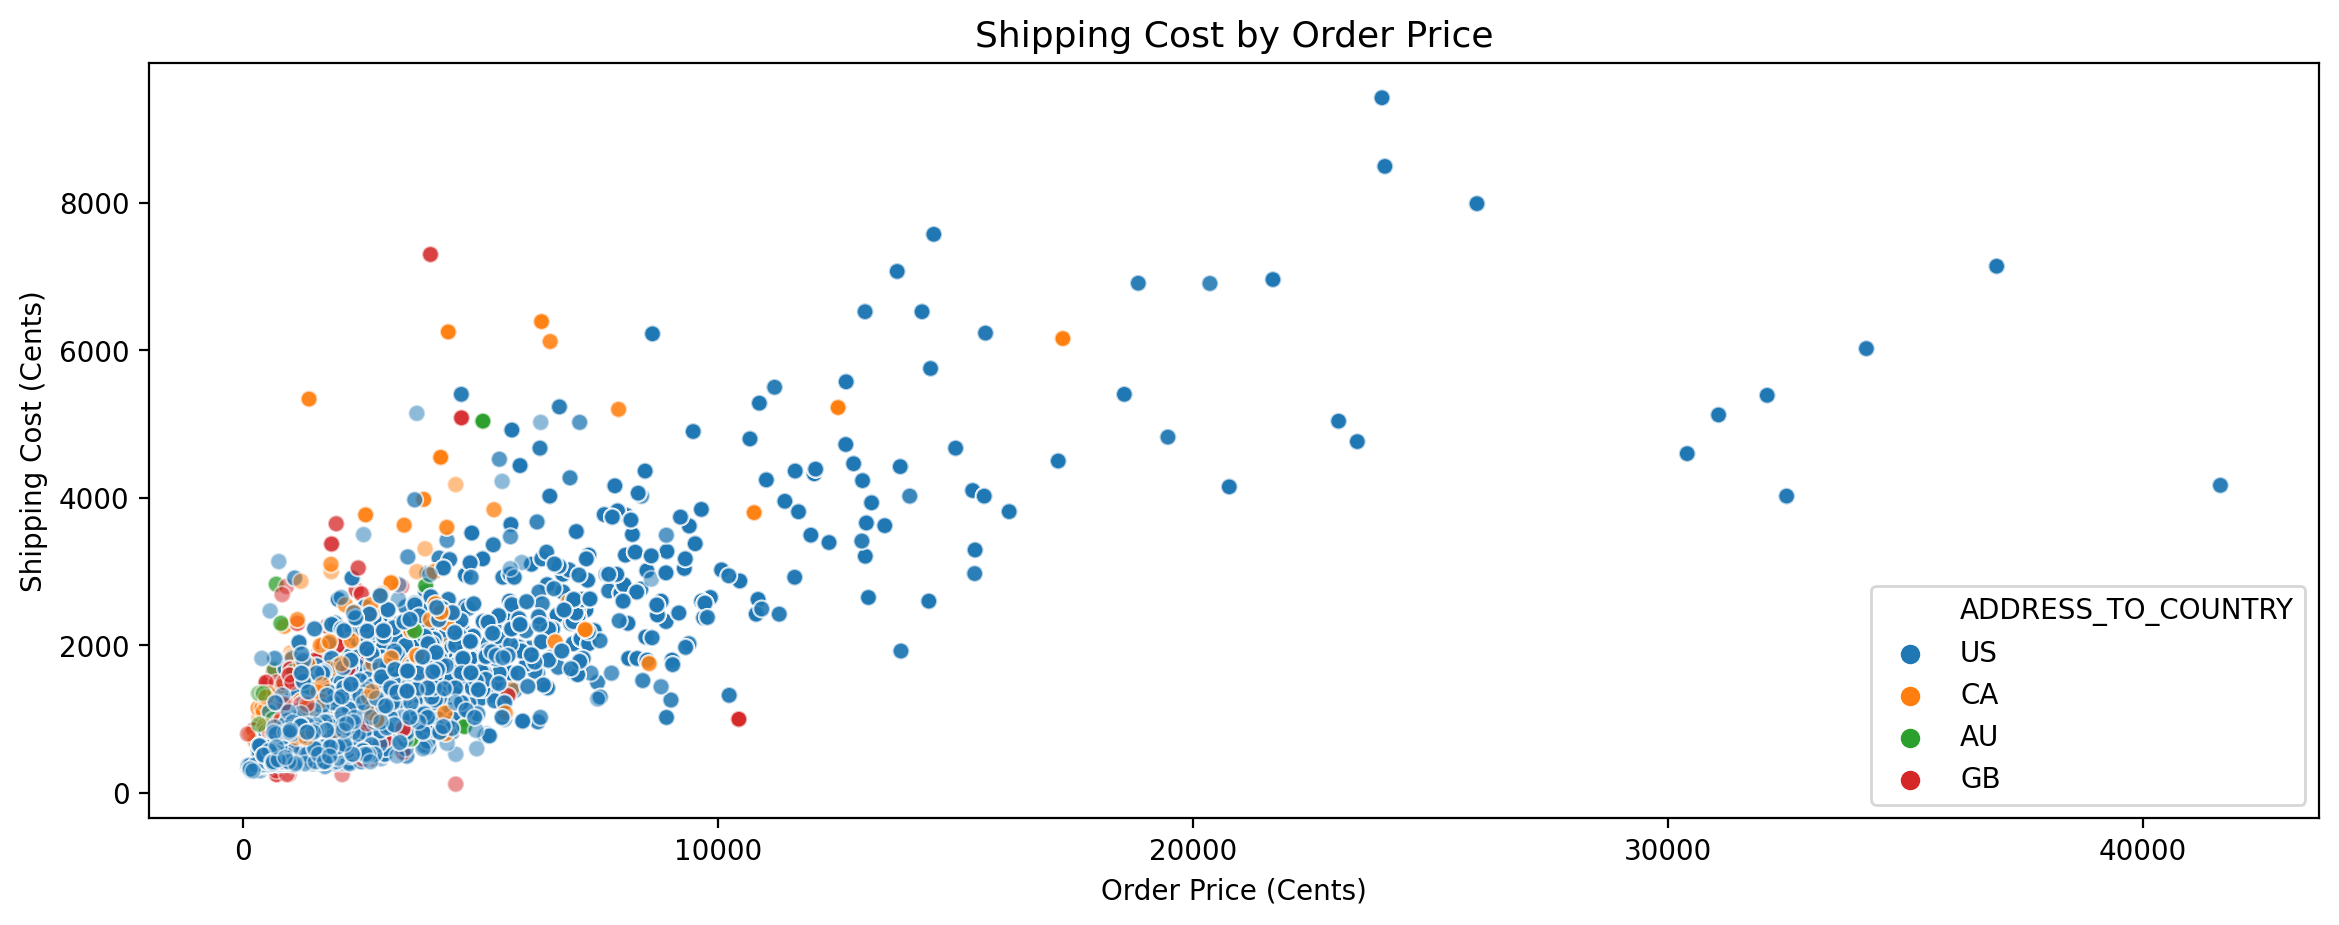

In [90]:
# The purpose of this section is to just get familiar with some possible insights.
# Scatter plot of shipping cost by order price
figure(num=None, figsize=(14, 5), dpi=200, facecolor='w', edgecolor='k')
dftarget = df.copy()
dftarget = df.loc[df['ADDRESS_TO_COUNTRY'].isin(['US','CA','GB','AU'])]
sns.scatterplot(x='TOTAL_COST',y='TOTAL_SHIPPING',data=dftarget,alpha=0.5, hue='ADDRESS_TO_COUNTRY',legend="full")
plt.xlabel('Order Price (Cents)')
plt.ylabel('Shipping Cost (Cents)')
plt.title('Shipping Cost by Order Price', fontsize=13);

In [91]:
# Timeseries of GMV via Cufflink

# Library Configuration
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Group by ORDER_ID
dftarget = df.copy()
dftarget.drop_duplicates(subset=['ORDER_ID'], keep='first', inplace=True)
timeseries = round((dftarget.groupby(['ORDER_DT'])['GMV($)'].sum()),0).to_frame(name= 'timeseries').reset_index()

# Add the weekday feature as a tooltip for the graph
timeseries['weekday'] = timeseries['ORDER_DT'].dt.day_name()
timeseries = timeseries.set_index('ORDER_DT')

# Plot the graph using iplot
timeseries.iplot(y='timeseries',mode = 'lines', xTitle ='', yTitle ='',text='weekday',title = 'Gross Merchandise Value (GMV) $')

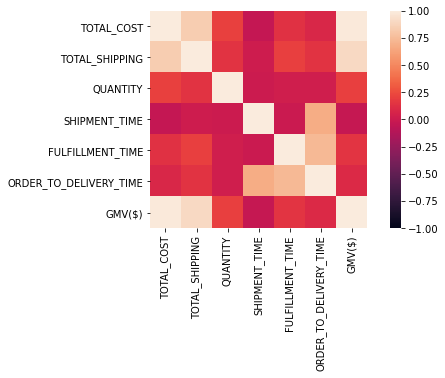

In [92]:
# Heatmap Analysis

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True);

# 3- Answering the questions

In [76]:
# 2- How many orders our merchants generate on from which sales channels do they come?
print('Total orders placed by Merchants from October to December 2020: ',df['ORDER_ID'].nunique())
print('---------------------------------------')

dfresult = pd.DataFrame(data={'Sales Channel':[''],'Total Orders':['']},columns=['Sales Channel','Total Orders'])
index = 0
for channel in df['SALES_CHANNEL_TYPE_ID'].unique():
    dfresult.at[index,'Sales Channel'] = channel
    dfresult.at[index,'Total Orders'] = df.loc[df['SALES_CHANNEL_TYPE_ID'] == channel]['ORDER_ID'].nunique()
    index = index + 1
dfresult = dfresult.sort_values(['Total Orders'], ascending=[False])
dfresult = dfresult.reset_index(drop=True)
dfresult

# We can also consider the number of orders before dropping otliers or duplicates depending on projects. 

Total orders placed by Merchants from October to December 2020:  12629
---------------------------------------


,Sales Channel,Total Orders
0,4,5031
1,2,3868
2,1,3065
3,6,284
4,3,191
5,9,161
6,7,24
7,11,5


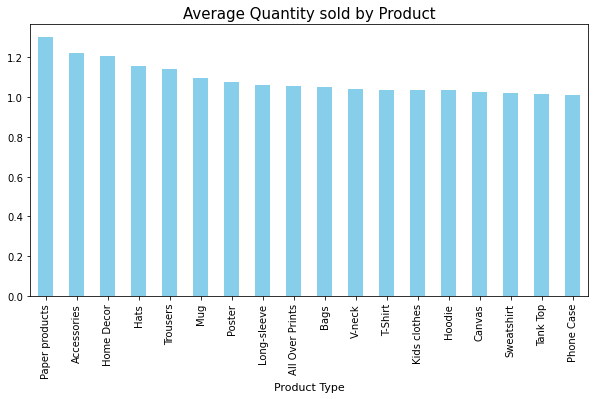

--------------------------------------------------------------------------------------------------------



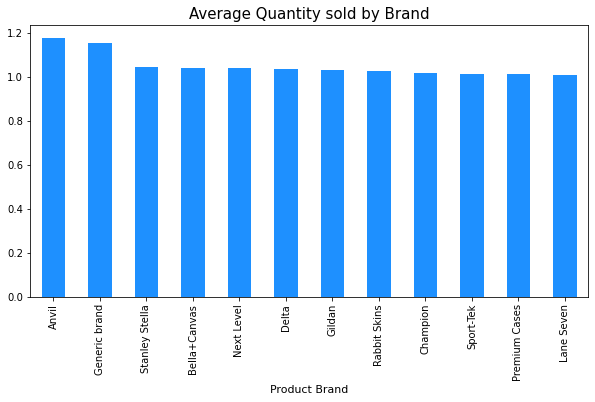

In [77]:
# 3- What is the average quantity of line items per each product type and each product brand?
# Groupby and plot
df.groupby(['PRODUCT_TYPE'])['QUANTITY'].mean().sort_values(ascending=False).loc[lambda x : x>1].plot(kind = 'bar',\
                                            x='Product Type', y='Quantity', color='skyblue', width=0.5, figsize = (10,5));
plt.title("Average Quantity sold by Product", fontsize=15)
plt.xlabel('Product Type', fontsize=11)
plt.show()
print('--------------------------------------------------------------------------------------------------------\n')
df.groupby(['PRODUCT_BRAND'])['QUANTITY'].mean().sort_values(ascending=False).loc[lambda x : x>1].plot(kind = 'bar',\
                                        x='Product Brand', y='Quantity', color='dodgerblue', width=0.5, figsize = (10,5));
plt.title("Average Quantity sold by Brand", fontsize=15)
plt.xlabel('Product Brand', fontsize=11)
plt.show()

In [95]:
# 4- Which are the most used shipping carriers and which are the fastest ones?
# Most popular shipping company is one which delivers more orders, though I believe it would be fairer if we devided it by
# country. With respect to Fastest one, first I will make a new column calles SHIPMENT_TIME as follows:
df['SHIPMENT_TIME'] = (df['SHIPMENT_DELIVERD_DT']-df['FULFILLED_DT'])/ np.timedelta64(1, 'h')/24
# Then, I will generate a new table to show shipping companies by total orders and average delivery time
dfresult = pd.DataFrame(data={'Shipping Company':[''],'Total Orders':[''],'Average Shipment Time(Day)':['']},
                        columns=['Shipping Company','Total Orders','Average Shipment Time(Day)'])
index = 0
for company in df['SHIPMENT_CARRIER'].unique():
    dfresult.at[index,'Shipping Company'] = company
    dftarget = df.loc[df['SHIPMENT_CARRIER'] == company]
    dftarget.drop_duplicates(subset=['ORDER_ID'], keep='first', inplace=True)
    dfresult.at[index,'Total Orders'] = dftarget.shape[0]
    dfresult.at[index,'Average Shipment Time(Day)'] = round(dftarget['SHIPMENT_TIME'].mean(),2)
    index = index + 1
dfresult = dfresult.sort_values(['Total Orders'], ascending=[False])
dfresult = dfresult.reset_index(drop=True)
dfresult.to_csv('Q4.csv', index=None)
dfresult[:7]

,Shipping Company,Total Orders,Average Shipment Time(Day)
0,USPS,9560,5.95
1,UPS_MAIL_INNOVATIONS,625,8.94
2,DHL,455,5.01
3,GLOBEGISTICS,292,26.91
4,CANADA_POST,209,8.05
5,UPS,180,3.74
6,ASENDIA,157,11.33


In [96]:
# 5- Are there any problematic print providers?
# One way to identify a problematic provider is to consider REPRINT_FLAG (Accuracy)
# Another way is to define a KPI to show how fast a provider is: (FULFILLED_DT - ORDER_DT)/QUANTITY
df['FULFILLMENT_TIME'] = (df['FULFILLED_DT'] - df['ORDER_DT'])/ np.timedelta64(1, 'h')/24
df['ORDER_TO_DELIVERY_TIME'] = df['FULFILLMENT_TIME'] + df['SHIPMENT_TIME']
dfresult = pd.DataFrame(data={'Print Provider':[''],'Total Quantity Printed':[''],'Orders Reprinted%':[''],
'Days for each Quantity to be printed':['']},columns=['Print Provider','Total Quantity Printed','Orders Reprinted%',
                                                    'Days for each Quantity to be printed'])
index = 0
for pprovider in df['PRINT_PROVIDER_ID'].unique():
    dfresult.at[index,'Print Provider'] = pprovider
    dftarget = df.loc[df['PRINT_PROVIDER_ID'] == pprovider]
    dftarget2 = dftarget.copy()
    dftarget2.drop_duplicates(subset=['ORDER_ID'], keep='first', inplace=True)
    dfresult.at[index,'Total Quantity Printed'] = dftarget['QUANTITY'].sum()
    dfresult.at[index,'Orders Reprinted%'] = round(dftarget2['REPRINT_FLAG'].mean(),2)
    # Total fulfillment time for unique orders (dftarget2) devided by quantity of all line items (dftarget)
    dfresult.at[index,'Days for each Quantity to be printed'] = round(dftarget2['FULFILLMENT_TIME'].sum()/dftarget['QUANTITY']\
                                                                                                                  .sum(),2)
    index = index + 1
dfresult = dfresult.sort_values(['Orders Reprinted%'], ascending=[False])
dfresult = dfresult.reset_index(drop=True)
# At least, 100 should be printed until a provider's performance is assessed. 
# The rate of acceptable reprinting should be clarified in provider contracts. 
# I would propose Orders Reprinted% level as 1%, and Printing Time(Day) as above 3 days
dfresult.to_csv('Q5.csv', index=None)
dfresult.loc[(dfresult['Total Quantity Printed'] >= 100) &\
             ((dfresult['Orders Reprinted%'] >= 1)&(dfresult['Days for each Quantity to be printed'] > 3))]
# Therefore, I will consider provider 2 and 16 as problematic
# Important Note: I dropped canceled and on-hold orders. If the resean of cancelling was low quality product, then it shouldn't
# be deleted for all the answers. So, it deponds on the definition of 'canceled' in your company.

,Print Provider,Total Quantity Printed,Orders Reprinted%,Days for each Quantity to be printed
3,2,596,1.88,4.1
5,16,1377,1.29,3.27


In [100]:
# 6-1 What characteristics describe more successful merchants?
# Who is more successfull?! A merchant making more money (GMV), on the second place, orders.
# First let's define a new KPI called Gross Merchandise Value (GMV) 
df['GMV($)'] = (df['TOTAL_SHIPPING'] + df['TOTAL_COST'])/100
# Let's gather everything which matters to see what features we can find
dfresult = pd.DataFrame(data={'Merchant':[''],'GMV($)':[''],'Order':[''],'Sales Channel':[''],'Plan':[''],
            'Shipment Company':[''],'Brand':[''],'Product':[''], 'Print Provider':['']},columns=['Merchant','GMV($)','Order',
            'Sales Channel','Plan','Shipment Company','Brand','Product', 'Print Provider'])

# Generate the table
index = 0
for merchant in df['MERCHANT_ID'].unique():
    dfresult.at[index,'Merchant'] = merchant
    dftarget = df.loc[df['MERCHANT_ID'] == merchant]
    dftarget2 = dftarget.copy()
    dftarget2.drop_duplicates(subset=['ORDER_ID'], keep='first', inplace=True)
    dfresult.at[index,'GMV($)'] = dftarget2['GMV($)'].sum()
    dfresult.at[index,'Order'] = dftarget2.shape[0]
    dfresult.at[index,'Sales Channel'] = dftarget2['SALES_CHANNEL_TYPE_ID'].mode().sum()
    dfresult.at[index,'Plan'] = dftarget2['SUB_PLAN'].mode().sum()
    dfresult.at[index,'Shipment Company'] = dftarget2['SHIPMENT_CARRIER'].mode().sum()
    dfresult.at[index,'Brand'] = dftarget2['PRODUCT_BRAND'].mode().sum()
    dfresult.at[index,'Product'] = dftarget2['PRODUCT_TYPE'].mode().sum()
    dfresult.at[index,'Print Provider'] = dftarget2['PRINT_PROVIDER_ID'].mode().sum()
    index = index + 1
dfresult = dfresult.sort_values(['GMV($)'], ascending=[False])
dfresult = dfresult.reset_index(drop=True)
dfresult.to_csv('Q6.csv', index=None)
dfresult.head(3)
# The below table shows 3 top merchant with regard to GMV($)

,Merchant,GMV($),Order,Sales Channel,Plan,Shipment Company,Brand,Product,Print Provider
0,5755049,2934.9,81,1,Plan 3,USPS,Generic brand,T-Shirt,1
1,6433350,2532.1,101,2,Plan 4,USPS,Gildan,Hoodie,29
2,7019548,2036.4,146,6,Plan 3,USPS,Generic brand,Mug,30


In [25]:
# 6-2 200 least successfull merchants features
display(round(dfresult['Sales Channel'].tail(200).value_counts(normalize=True)[:3]*100,2))
display(round(dfresult['Plan'].tail(200).value_counts(normalize=True)[:3]*100,2))
display(round(dfresult['Shipment Company'].tail(200).value_counts(normalize=True)[:3]*100,2))
display(round(dfresult['Brand'].tail(200).value_counts(normalize=True)[:3]*100,2))
display(round(dfresult['Product'].tail(200).value_counts(normalize=True)[:3]*100,2))
display(round(dfresult['Print Provider'].tail(200).value_counts(normalize=True)[:3]*100,2))

4    66.0
2    14.0
1    12.5
Name: Sales Channel, dtype: float64

0         65.0
Plan 3    33.5
Plan 4    1.5 
Name: Plan, dtype: float64

USPS                    85.0
UPS_MAIL_INNOVATIONS    13.0
0                       2.0 
Name: Shipment Company, dtype: float64

Generic brand    100.0
Name: Brand, dtype: float64

Accessories       66.5
Paper products    19.5
Home Decor        7.0 
Name: Product, dtype: float64

10    56.5
1     22.5
48    10.0
Name: Print Provider, dtype: float64

In [26]:
# 6-3 200 most successfull merchants features
display(round(dfresult['Sales Channel'].head(200).value_counts(normalize=True)[:3]*100,2))
display(round(dfresult['Plan'].head(200).value_counts(normalize=True)[:3]*100,2))
display(round(dfresult['Shipment Company'].head(200).value_counts(normalize=True)[:3]*100,2))
display(round(dfresult['Brand'].head(200).value_counts(normalize=True)[:3]*100,2))
display(round(dfresult['Product'].head(200).value_counts(normalize=True)[:3]*100,2))
display(round(dfresult['Print Provider'].head(200).value_counts(normalize=True)[:3]*100,2))

1    34.0
4    31.0
2    29.5
Name: Sales Channel, dtype: float64

Plan 3    79.0
0         10.0
Plan 4    8.5 
Name: Plan, dtype: float64

USPS                    88.0
UPS_MAIL_INNOVATIONS    3.5 
UPS                     2.5 
Name: Shipment Company, dtype: float64

Gildan           37.0
Generic brand    34.0
Bella+Canvas     18.5
Name: Brand, dtype: float64

T-Shirt       41.5
Sweatshirt    11.5
Hoodie        9.5 
Name: Product, dtype: float64

29    31.0
3     14.5
10    12.5
Name: Print Provider, dtype: float64

In [ ]:
# 6-4 ////////////////The Answer of Question 6:///////////////

# First of all, a successfull merchant is a merchant who makes more money from Printify compared to other its peers
# The top 200 merchants were compared based upon 6 criteria as followes:
# 1- Sales channel: least successfull merchans use mostly channel 4 while most successfull ones use channel 1
# 2- Plan: least successfull merchans have no subscription plan while most successfull ones use Plan 3 (79% of them)
# 3- Shipment Company: No difference was observed. Both mostly use USPS
# 4- Brand : least successfull merchans use generic brands almost always while most successfull ones use a portfolio of brands
# 5- Product Type: least successfull merchants sell accessories (66.5%) while most successfull ones sell clothing(62.5%)
# 6- Print provider: with regards to problematic providers(Q5), no difference was observed 

# In conclusion, successfull merchants are committed to Printify, use more effective channels with unique brands and products

In [8]:
# 7- Write SQL code 
# The following code has been written for MySQL and can be modified for PostgreSQL, BigQuery and etc.

conn = pymysql.connect(host='127.0.0.1', port=3306, user='root', password='xxxxxxxx', db='milad')

Query="SELECT a.MERCHANT_ID 'Merchant', COUNT(DISTINCT a.ORDER_ID) 'Items of T-Shirt Sold', \
SUM(DISTINCT a.TOTAL_COST) + SUM(DISTINCT a.TOTAL_SHIPPING) 'Cost+Shipping collected', \
ROUND(AVG(DATEDIFF(a.SHIPMENT_DELIVERD_DT, a.ORDER_DT)),2) 'Fulfilment Time' \
FROM orders a \
LEFT JOIN line_items b ON a.ORDER_ID=b.ORDER_ID \
WHERE b.PRODUCT_TYPE = 'T-Shirt' \
GROUP BY MERCHANT_ID \
ORDER BY COUNT(DISTINCT a.ORDER_ID) DESC \
;"

cursor=conn.cursor()
cursor.execute(Query)
# The following is the real examaple (For 10 observations only) of query executed
cursor.fetchall()[:10]

((6795017, 78, Decimal('44528'), Decimal('14.16')),
 (7036902, 62, Decimal('30309'), Decimal('9.03')),
 (6046074, 60, Decimal('15503'), Decimal('8.91')),
 (7084134, 59, Decimal('18953'), Decimal('7.42')),
 (7146390, 50, Decimal('100726'), Decimal('9.10')),
 (7235781, 49, Decimal('16601'), Decimal('7.04')),
 (7110501, 44, Decimal('18789'), Decimal('6.48')),
 (7162848, 44, Decimal('9537'), Decimal('8.40')),
 (6118692, 43, Decimal('98347'), Decimal('7.23')),
 (5755049, 37, Decimal('131239'), Decimal('11.53')))

# 4- Proposed KPIs to measure Printify performance in different aspects 
***1- Sales/Performance***:<br>
Gross Merchandise Value (GMV): (TOTAL_COST + TOTAL_SHIPPING)<br>
Ancillary Revenue: (POS and Referral fees)<br>
Active Merchants Counts: (MERCHANT_ID if meets company activity condition)<br>
Merchants Score: ??? (Via API?)<br>
Return of Investment (ROI): ((final value - initial value)/investment)<br>
Top 50 largest Merchants (Order GMV)<br>
***2- Subscription***:<br> 
Active Subscriber Counts (ASC): (Acquisitions + Cancellation + Churned users)<br>
Customer Acquisition Cost (CAC): (Marketing costs (i.e sum of all campaigns costs) / New subscribers)<br>
Customer Lifetime Value (CLV): (Total sales of merchants for all of their lifespan)<br>
Average Revenue per User (ARPU): (Revenue from subscription / total merchants)<br>
Monthly Recurring Revenue (MRR) = ARPU x Total number of merchants (across the Month)<br>
***3- Customer Service***:<br> 
Total number of customer complaints<br>
Customer satisfaction (CSAT) or NPS: (Done by survey)<br>
Number of customers making complaints<br>
Average resolution time vs Average Response Time<br>
Percentage of customers with repeat orders<br>
Customer retention Rate<br>
***4- Delivery***:<br> 
Fulfilment Speed: (FULFILLED_DT - ORDER_DT)/QUANTITY<br>
Provider Accuracy: (average REPRINT_FLAG False(0)-True(100))<br>
Complete fulfilment duration: (SHIPMENT_DELIVERD_DT - ORDER_DT)<br>
Canceled/Hold product rate: (canceled items/total)<br>
on-time delivery<br>

# 5- Saving and sending the clean dataset to visualization tools

In [98]:
df.head(5)

,MERCHANT_ID,SHOP_ID,ORDER_ID,ADDRESS_TO_COUNTRY,ADDRESS_TO_REGION,ORDER_DT,FULFILLED_DT,REPRINT_FLAG,SALES_CHANNEL_TYPE_ID,TOTAL_COST,TOTAL_SHIPPING,MERCHANT_REGISTERED_DT,SUB_IS_ACTIVE_FLAG,SUB_PLAN,SHIPMENT_CARRIER,SHIPMENT_DELIVERD_DT,PRINT_PROVIDER_ID,PRODUCT_BRAND,PRODUCT_TYPE,ITEM_STATUS,QUANTITY,US STATE,SHIPMENT_TIME,FULFILLMENT_TIME,ORDER_TO_DELIVERY_TIME,GMV($)
0,0000265,500685,500685.28000,US,IL,2020-12-04,2020-12-11,0,4,1964,574,2017-05-31,0,NaN,USPS,2020-12-29,10,Generic brand,Accessories,shipment_out_for_delivery,4.0,Illinois,18.0,7.0,25.0,25.38
1,0002071,73270,73270.55780,US,IL,2020-11-07,2020-11-11,0,1,805,424,2017-05-31,100,Plan 3,USPS,2020-11-14,29,Bella+Canvas,T-Shirt,shipment_delivered,1.0,Illinois,3.0,4.0,7.0,12.29
2,0002071,73270,73270.56740,CA,NT,2020-11-13,2020-11-16,0,1,1231,615,2017-05-31,100,Plan 3,CANADA_POST,2020-11-24,41,Bella+Canvas,T-Shirt,shipment_delivered,1.0,NaN,8.0,3.0,11.0,18.46
3,0002071,73270,73270.56880,CA,BC,2020-11-14,2020-11-16,0,1,1231,615,2017-05-31,100,Plan 3,CANADA_POST,2020-11-24,41,Bella+Canvas,T-Shirt,shipment_delivered,1.0,NaN,8.0,2.0,10.0,18.46
4,0002071,73270,73270.58870,US,CA,2020-11-20,2020-11-21,0,1,805,424,2017-05-31,100,Plan 3,USPS,2020-11-28,29,Bella+Canvas,T-Shirt,shipment_delivered,1.0,California,7.0,1.0,8.0,12.29


In [89]:
df.to_csv('dfv1.csv', index=None)